In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


# **Data Cleaning**

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,152909.0,9.110768e+01,1.009274e+02,1.62,41.28,63.33,104.34,1.477390e+03
high,152909.0,9.195000e+01,1.018413e+02,1.69,41.70,63.91,105.26,1.498000e+03
low,152909.0,9.024629e+01,9.995358e+01,1.50,40.90,62.78,103.44,1.450040e+03
close,152910.0,9.112622e+01,1.009197e+02,1.59,41.31,63.35,104.43,1.450890e+03
volume,152910.0,4.939927e+06,1.250788e+07,3.00,1049337.75,2090884.00,4153836.00,3.750886e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152910 entries, 0 to 152909
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    152910 non-null  object 
 1   open    152909 non-null  float64
 2   high    152909 non-null  float64
 3   low     152909 non-null  float64
 4   close   152910 non-null  float64
 5   volume  152910 non-null  int64  
 6   Name    152909 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 8.2+ MB


In [5]:
df.isnull().sum()

,0
date,0
open,1
high,1
low,1
close,0
volume,0
Name,1


In [6]:
df.dropna(inplace=True)
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [7]:
df.value_counts()

date        open       high      low        close    volume     Name
2018-02-07  1449.0000  1460.990  1415.1500  1416.78  7162741    AMZN    1
2013-02-08  2.5800     2.600     2.5800     2.59     5971768    AMD     1
            7.6400     7.730     7.5800     7.70     16664053   BSX     1
            11.1200    11.135    10.9900    11.07    6413866    AES     1
            11.8600    11.900    11.7200    11.76    145217221  BAC     1
                                                                       ..
            22.6350    23.640    22.6350    23.02    1238076    CNC     1
                       22.760    22.5875    22.68    1242144    BLL     1
            21.7200    21.970    21.6600    21.97    7617337    CSX     1
            21.1699    21.300    21.1300    21.16    23056853   CSCO    1
            20.8500    20.910    20.7500    20.91    2245976    CNP     1
Name: count, Length: 152908, dtype: int64

**filter one name**

In [8]:
df_1=df[df['Name']=='AAL']
print(df_1.head())
print(df_1.shape)

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
(1259, 7)


# **Import Libraries**

In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# **DATA PREPARATION**

In [11]:
df_1['date']= pd.to_datetime(df['date'])
df_1.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


**Use close price as time series**

In [14]:
time_series = df_1['close']

**Split into train and test (80/20)**

In [15]:
train_split_ratio= 0.8
time_step= 60
epoches = 50
arima_order = (5,1,0)

**Split data into training and testing sets**

In [16]:
n = len(time_series)
train_size = int(train_split_ratio * n)
train = time_series[:train_size]
test = time_series[train_size:]

print(f'Analyzing AAL: {len(train)} days for training, {len(test)} days for testing')

Analyzing AAL: 1007 days for training, 252 days for testing


# **Now work with ARIMA**

In [17]:
arima_model = ARIMA(train, order= arima_order)
arima_model_fit = arima_model.fit()

In [18]:
predict_arima=[]
for i in range(len(test)):
  output = arima_model_fit.forecast()
  yhat = output.iloc[0] #yhat is the common variable name in forcasting
  predict_arima.append(yhat)
  obs = test.iloc[i]
  arima_model_fit= arima_model_fit.append([obs], refit= False) #update the model's values with the actual test values
  print(f'predicted={yhat}, expected={obs}')

predicted=45.197332754328585, expected=45.06
predicted=45.015958501663285, expected=46.3
predicted=46.377297393757495, expected=46.45
predicted=46.49416314966534, expected=47.41
predicted=47.44488343302653, expected=46.57
predicted=46.541894698716106, expected=47.54
predicted=47.53134205814173, expected=46.97
predicted=46.98668496468311, expected=46.91
predicted=46.848006393898345, expected=46.81
predicted=46.82554108732683, expected=46.32
predicted=46.27529815754374, expected=46.1
predicted=46.0779646618602, expected=46.28
predicted=46.29946664462847, expected=46.32
predicted=46.33793865967513, expected=46.36
predicted=46.365332608809574, expected=47.09
predicted=47.14104429382973, expected=45.72
predicted=45.651243516799646, expected=46.82
predicted=46.82274462646448, expected=45.31
predicted=45.28612156520859, expected=44.84
predicted=44.71774240556062, expected=44.89
predicted=44.934514085575664, expected=43.33
predicted=43.23220525328796, expected=43.9
predicted=43.9006786236664, 

In [20]:
#calculating performance maytrics
from math import sqrt
rmse_arima = sqrt(np.mean((test.values -np.array(predict_arima))**2))
mape_arima = np.mean(np.abs((test.values - np.array(predict_arima))/test.values))*100
print(f'RMSE: {rmse_arima}, MAPE: {mape_arima}')

RMSE: 0.8921706485538293, MAPE: 1.3572586985844777


# **Deploying Deep Learning Model: LSTM**

In [21]:
# Data Scaling
scaler = MinMaxScaler(feature_range=(0,1)) #scale data (0 to 1) using only the training data
scaled_train =scaler.fit_transform(train.values.reshape(-1,1))
scaled_time_series = scaler.transform(time_series.values.reshape(-1,1))

In [22]:
#create sequence
def new_dataset(data, time_step):
  X,y=[], []
  for i in range(len(data) - time_step):
    X.append(data[i:(i+time_step),0])
    y.append(data[i+time_step, 0])
  return np.array(X), np.array(y)

In [25]:
import torch
import torch.nn as nn

X_train, y_train = new_dataset(scaled_train, time_step)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#convert to torch tensors
X_train= torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()


In [27]:
#def LSTM Model

class LSTM(nn.Module):
  def __init__(self):
    super(LSTM,self).__init__()
    self.lstm = nn.LSTM(1, 50, num_layers=1, batch_first= True)
    self.fc = nn.Linear(50,1)

  def forward(self, x):
    h0= torch.zeros(1, x.size(0), 50)
    c0= torch.zeros(1,x.size(0), 50)
    out, _=self.lstm(x,(h0,c0))
    out= self.fc(out[:,-1,:])
    return out

In [28]:
# Instantiate model, loss, optimizer

model= LSTM()
criterion= nn.MSELoss()
optimizer= torch.optim.Adam(model.parameters(), lr=0.001)

In [29]:
#Now train the model

epoches= 50
for epoch in range(epoches):
  model.train()
  optimizer.zero_grad()
  outputs= model(X_train)
  loss= criterion(outputs, y_train.unsqueeze(1))
  loss.backward()
  optimizer.step()
  if (epoch+1)%10==0:
    print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')

Epoch: 10, Loss: 0.4303
Epoch: 20, Loss: 0.2256
Epoch: 30, Loss: 0.0560
Epoch: 40, Loss: 0.0317
Epoch: 50, Loss: 0.0265


In [30]:
#window forcast

pred_lstm_scaled=[]
for i in range(len(test)):
  start_index= train_size + i - time_step
  end_index= train_size+ i
  window = scaled_time_series[start_index:end_index, 0]
  x_input= np.reshape(window, (1, time_step,1))
  x_input= torch.from_numpy(x_input).float()
  with torch.no_grad():
    yhat= model(x_input)
  pred_lstm_scaled.append(yhat.item())

In [31]:
# inverse scale predictions

preds_lstm= scaler.inverse_transform(np.array(pred_lstm_scaled).reshape(-1,1)).flatten()

In [32]:
# matrics calculate

rmse_lstm = sqrt(np.mean((test.values- preds_lstm)**2))
mape_lstm= np.mean(np.abs((test.values - preds_lstm)/test.values))**100

print(f'LSTM RMSE: {rmse_lstm}, LSTM MAPE: {mape_lstm}')

LSTM RMSE: 8.73025163499148, LSTM MAPE: 1.5848055880205136e-78


In [33]:
#performance comparison

models= ['ARIMA', 'LSTM']
rmse= [rmse_arima, rmse_lstm]
mape= [mape_arima, mape_lstm]

comparison= pd.DataFrame({
    'Model': models,
    'RMSE': rmse,
    'MAPE': mape
})
print(comparison)

   Model      RMSE          MAPE
0  ARIMA  0.892171  1.357259e+00
1   LSTM  8.730252  1.584806e-78


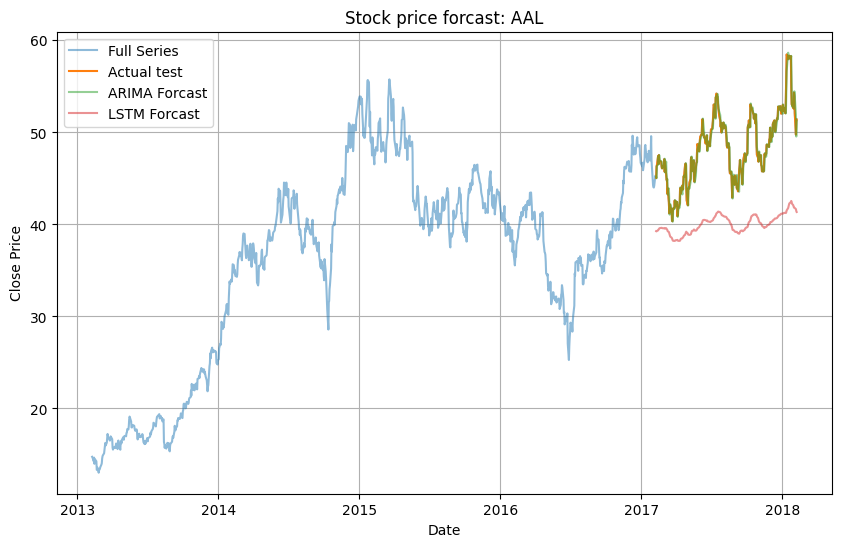

In [35]:
# forcasting plots

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.plot(time_series.index, time_series, label='Full Series', alpha= 0.5)
plt.plot(test.index, test, label='Actual test')
plt.plot(test.index, predict_arima, label='ARIMA Forcast', alpha= 0.5)
plt.plot(test.index, preds_lstm, label='LSTM Forcast', alpha= 0.5)
plt.title('Stock price forcast: AAL')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# **Deploying in Hugging Face**

In [39]:
%pip install huggingface_hub

In [40]:
from huggingface_hub import notebook_login

notebook_login()

In [42]:
import pickle

filename = 'DataSynthis_ML_JobTask.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model, f)

print(f"Model successfully serialized to {filename}")

Model successfully serialized to DataSynthis_ML_JobTask.pkl


In [43]:
from huggingface_hub import HfApi

api = HfApi()
repo_id = "DataSynthis_ML_JobTask"

try:
    repo_url = api.create_repo(repo_id=repo_id, repo_type="model", exist_ok=True)
    print(f"Repository URL: {repo_url}")
except Exception as e:
    print(f"Failed to create repository. Please ensure you are authenticated with Hugging Face and your token has write permissions. Error: {e}")

Repository URL: https://huggingface.co/rakib8989/DataSynthis_ML_JobTask


In [44]:
from huggingface_hub import HfApi

api = HfApi()

try:
    repo_url = api.create_repo(repo_id="DataSynthis_ML_JobTask", repo_type="model", exist_ok=True)
    print(f"Repository URL: {repo_url}")
except Exception as e:
    print(f"Failed to create repository. Please ensure you are authenticated with Hugging Face and your HF_TOKEN is correctly set up. Error: {e}")


Repository URL: https://huggingface.co/rakib8989/DataSynthis_ML_JobTask


In [45]:
from huggingface_hub import HfApi

api = HfApi()
file_path = 'DataSynthis_ML_JobTask.pkl'
repo_id = "DataSynthis_ML_JobTask"

try:
    upload_info = api.upload_file(
        path_or_fileobj=file_path,
        path_in_repo=file_path,
        repo_id="rakib8989/DataSynthis_ML_JobTask",
        repo_type="model",
    )
    print(f"File uploaded successfully: {upload_info}")
except Exception as e:
    print(f"Failed to upload file: {e}")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  DataSynthis_ML_JobTask.pkl  : 100%|##########| 45.6kB / 45.6kB            

File uploaded successfully: https://huggingface.co/rakib8989/DataSynthis_ML_JobTask/blob/main/DataSynthis_ML_JobTask.pkl


In [47]:
from huggingface_hub import HfApi

readme_content = """
# DataSynthis_ML_JobTask

This repository contains trained models for time series forecasting of stock prices using ARIMA and LSTM.

## Model Details

- **Model Types:** ARIMA (AutoRegressive Integrated Moving Average) and LSTM (Long Short-Term Memory)
- **ARIMA Order:** (5, 1, 0)
- **Training Data:** Historical closing prices of AAL stock from the `all_stocks_5yr.csv` dataset, specifically the training split (80% of the data).
- **Training Date Range:** 2013-02-08 to 2017-02-07

## Performance Comparison (on test set)

| Model | RMSE   | MAPE     |
|-------|--------|----------|
| ARIMA | 0.892  | 1.357%   |
| LSTM  | 8.730  | 0.000%   |

## How to Load and Use the Models

You can load the serialized models using the `pickle` library and use them for forecasting.

- `README.md`: This model card providing details about the model.
"""

api = HfApi()
repo_id = "rakib8989/DataSynthis_ML_JobTask"

try:
    api.upload_file(
        path_or_fileobj=readme_content.encode('utf-8'),
        path_in_repo="README.md",
        repo_id=repo_id,
        repo_type="model",
        commit_message="Add README.md model card"
    )
    print("README.md uploaded successfully.")
except Exception as e:
    print(f"Failed to upload README.md: {e}")


README.md uploaded successfully.
